In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress

In [3]:
# Import timeit.
#import timeit
#%timeit np.random.uniform(-90.000, 90.000, size=1500)
lat=np.random.uniform(-90,90,1500)
lng=np.random.uniform(-90,90,1500)
lat_lng=zip(lat,lng)
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lng)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [5]:
city_data = []
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key


# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adrar
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | astana
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 1 | saint-pierre
Processing Record 10 of Set 1 | naron
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | bonthe
Processing Record 13 of Set 1 | lardos
Processing Record 14 of Set 1 | cidreira
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | kutum
Processing Record 19 of Set 1 | kant
Processing Record 20 of Set 1 | bargal
City not found. Skipping...
Processing Record

Processing Record 35 of Set 4 | bhanpura
Processing Record 36 of Set 4 | acajutla
Processing Record 37 of Set 4 | saldanha
Processing Record 38 of Set 4 | bengkulu
Processing Record 39 of Set 4 | thinadhoo
Processing Record 40 of Set 4 | isnos
Processing Record 41 of Set 4 | onokhino
Processing Record 42 of Set 4 | nsanje
Processing Record 43 of Set 4 | ladario
Processing Record 44 of Set 4 | oistins
Processing Record 45 of Set 4 | bathsheba
Processing Record 46 of Set 4 | novoagansk
Processing Record 47 of Set 4 | soavinandriana
Processing Record 48 of Set 4 | sao joao da barra
Processing Record 49 of Set 4 | usinsk
Processing Record 50 of Set 4 | iturama
Processing Record 1 of Set 5 | bakchar
Processing Record 2 of Set 5 | poli
Processing Record 3 of Set 5 | mahon
Processing Record 4 of Set 5 | gornopravdinsk
Processing Record 5 of Set 5 | mabamba
Processing Record 6 of Set 5 | farafangana
Processing Record 7 of Set 5 | lubumbashi
Processing Record 8 of Set 5 | velyka kisnytsya
City 

Processing Record 23 of Set 8 | letlhakeng
Processing Record 24 of Set 8 | oum hadjer
Processing Record 25 of Set 8 | myskhako
Processing Record 26 of Set 8 | arlit
Processing Record 27 of Set 8 | aqtobe
Processing Record 28 of Set 8 | kautokeino
Processing Record 29 of Set 8 | leshukonskoye
Processing Record 30 of Set 8 | camana
Processing Record 31 of Set 8 | ati
Processing Record 32 of Set 8 | saint-augustin
Processing Record 33 of Set 8 | polunochnoye
Processing Record 34 of Set 8 | booue
Processing Record 35 of Set 8 | minab
Processing Record 36 of Set 8 | ebolowa
Processing Record 37 of Set 8 | burton
Processing Record 38 of Set 8 | galle
Processing Record 39 of Set 8 | atocha
Processing Record 40 of Set 8 | yarmouth
Processing Record 41 of Set 8 | salinopolis
Processing Record 42 of Set 8 | tabou
Processing Record 43 of Set 8 | zhanaozen
Processing Record 44 of Set 8 | finsterwalde
Processing Record 45 of Set 8 | muscle shoals
Processing Record 46 of Set 8 | lusambo
Processing R

Processing Record 13 of Set 12 | maniitsoq
Processing Record 14 of Set 12 | cap malheureux
Processing Record 15 of Set 12 | monduli
Processing Record 16 of Set 12 | quatre cocos
Processing Record 17 of Set 12 | teguldet
Processing Record 18 of Set 12 | gouyave
Processing Record 19 of Set 12 | dharampur
Processing Record 20 of Set 12 | winder
Processing Record 21 of Set 12 | karakol
Processing Record 22 of Set 12 | marcona
City not found. Skipping...
Processing Record 23 of Set 12 | turukhansk
Processing Record 24 of Set 12 | muisne
Processing Record 25 of Set 12 | trofors
Processing Record 26 of Set 12 | valdivia
Processing Record 27 of Set 12 | vestmannaeyjar
Processing Record 28 of Set 12 | moshenskoye
Processing Record 29 of Set 12 | guaranda
Processing Record 30 of Set 12 | dudinka
Processing Record 31 of Set 12 | cockburn town
Processing Record 32 of Set 12 | herveo
Processing Record 33 of Set 12 | doka
Processing Record 34 of Set 12 | viedma
Processing Record 35 of Set 12 | rampu

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)
city_data_df = city_data_df[['City','Country', 'Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]

In [7]:
# Create the output file (CSV).
output_data_file = "Data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
city_data_df=pd.read_csv("Data/cities.csv")

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

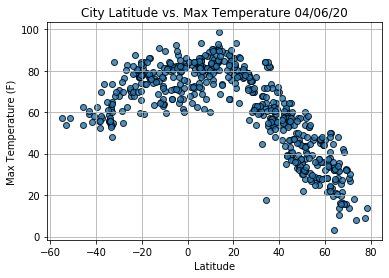

In [9]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Data/Fig1.png")

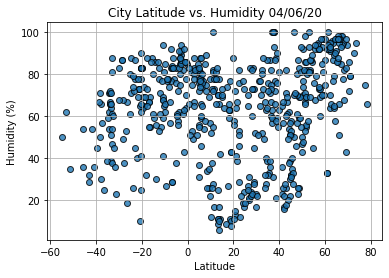

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Data/Fig2.png")

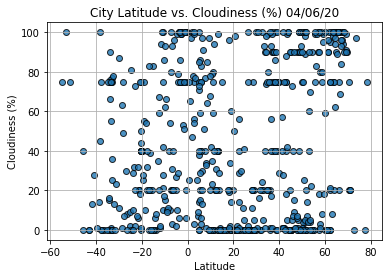

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Data/Fig3.png")

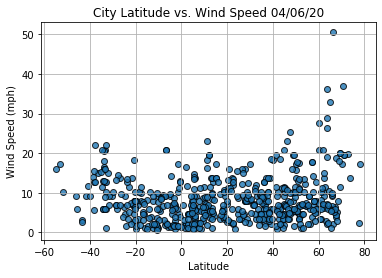

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Data/Fig4.png")

In [13]:

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()